In [2]:
cd("../../src/");
include("equilibrium.jl");
include("bifurcation.jl");
include("stability.jl");
cd("../examples/ABC-Reaction");

Base.IOError: IOError: cd("../../src/"): no such file or directory (ENOENT)

In [18]:
using Plots;

In [19]:
function f!(du,u,p,t)
    du[1] = -u[1] + p[1]*(1-u[1])*exp(u[3])
    du[2] = -u[2] + p[1]*(1-u[1])*exp(u[3]) - p[1]*p[4]*u[2]*exp(u[3])
    du[3] = -u[3] - p[3]*u[3] + p[1]*p[5]*(1-u[1])*exp(u[3]) + p[1]*p[5]*p[2]*p[4]*u[2]*exp(u[3])
end;

In [26]:
begin
    α = 1
    σ = 0.04
    B = 8
    β = 1.2:0.01:1.4
    D = 0.0
    x_ini = [[0.0,0.0,0.0] for i in β]
    p_ini = [[D,α,i,σ,B] for i in β]
    Δs= 0.001
    p_fin = 0.22
    indice = 1
    t = 0.0
end;

In [27]:
tiempo = @elapsed begin
    solfams = Equilibrium.(f!, x_ini, p_ini,t, Δs, p_fin,indice);
    Hb = Hopf_bifurcation.(f!,p_ini,t,indice,solfams)
    estabilidad = Stability_intervals.(f!,p_ini,t,indice,solfams)
end;

In [28]:
begin
    Hb = [[(Hb[i][j][1],norm(Hb[i][j][2])) for j in 1:length(Hb[i])] for i in 1:length(Hb)]
    estable = [[(estabilidad[i][1][j][1],norm(estabilidad[i][1][j][2])) for j in 1:length(estabilidad[i][1])] for i in 1:length(estabilidad)]
    inestable = [[(estabilidad[i][2][j][1],norm(estabilidad[i][2][j][2])) for j in 1:length(estabilidad[i][2])] for i in 1:length(estabilidad)]
end;

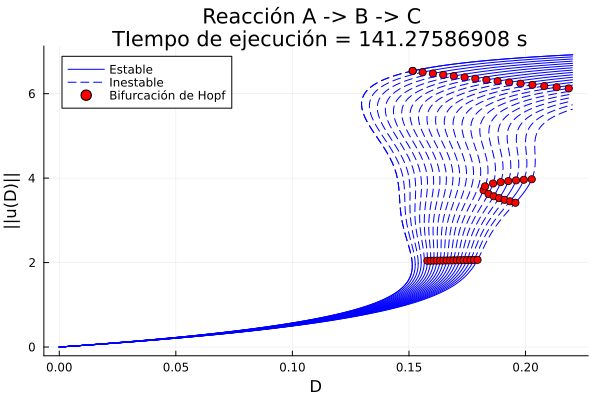

In [29]:
begin
    plot(title = "Reacción A -> B -> C \n TIempo de ejecución = $(tiempo) s", ylabel = "||u(D)||", xlabel = "D")
    plot!(estable[1], label = "Estable", linestyle = :solid, color = "blue")
    plot!(inestable[1], label = "Inestable", linestyle = :dash, color = "blue")
    scatter!(Hb[1], label = "Bifurcación de Hopf", color = "red")
    for i in 1:length(solfams)
        plot!(estable[i], label = "", linestyle = :solid, color = "blue")
        plot!(inestable[i], label = "", linestyle = :dash, color = "blue")
        scatter!(Hb[i], label = "", color = "red")
    end
    plot!()
end

In [8]:
begin
    for i in 1:length(x_ini)
        normas = []
        for j in 1:length(solfams[i][1])
            dx = zeros(length(x_ini))
            f!(dx,solfams[i][2][j],[k == indice ? solfams[i][1][j] : p_ini[i][k] for k in 1:length(p_ini[i])],t)
            push!(normas,norm(dx))
        end
        precision = plot(title = "Precisión de la rama", ylabel = "||F(u(λ),λ)||", xlabel = "λ")
        plot!(solfams[i][1],normas ,label = "λ_ini = $(p_ini[i]), x_ini = $(x_ini[i])")
        savefig("PrecisiónRama$(i).png")
    end
end

In [30]:
A = [1 2;
     3 4]
B = [1 2;
     3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [32]:
prueba = Equilibrium(f!, x_ini[1], p_ini[1],t, Δs, p_fin,indice)

([0.0, 0.0002481204244702726, 0.0004959324588964096, 0.0007434361935986573, 0.0009906320461077573, 0.0012375200820821592, 0.0014841007188098113, 0.0017303740225660476, 0.0019763404103786005, 0.0022219999491354283  …  0.21735490593916848, 0.21767346955253175, 0.21799333479876673, 0.21831450736630742, 0.2186369934146693, 0.21896079866559123, 0.2192859293152831, 0.21961239111774541, 0.21994019030482462, 0.22026933266198231], [[0.0, 0.0, 0.0], [0.0002482828828973518, 0.000248280416534017, 0.0009028558154940844], [0.0004965821010411189, 0.0004965722325851869, 0.0018057889799885647], [0.000744897456788775, 0.0007448752460169476, 0.002708798791129329], [0.0009932290806034865, 0.000993189582781914, 0.00361188573972672], [0.0012415767496617943, 0.0012415150155669756, 0.004515049031841713], [0.0014899405945889427, 0.0014898516704778945, 0.005418289158908758], [0.0017383203926636971, 0.0017381993203081018, 0.006321605327342607], [0.0019867162746588234, 0.001986558091301632, 0.007224998029148492],

In [33]:
x0 = x_ini[1]
p0 = p_ini[1]

5-element Vector{Float64}:
 0.0
 1.0
 1.2
 0.04
 8.0

In [62]:
S = set_variables("s",numvars = 4,order = 3)
r = set_variables("r",numvars = 1,order = 0)
x = x0 + S[1:end-1]
p = p0 + [i == indice ? S[2] : r for i in 1:length(p0)] 

LoadError: Order must be at least 1

In [37]:
dx = x

3-element Vector{TaylorN{Float64}}:
  1.0 s₁ + 𝒪(‖x‖⁴)
  1.0 s₂ + 𝒪(‖x‖⁴)
  1.0 s₃ + 𝒪(‖x‖⁴)

In [38]:
f!(dx,x,p,t)

 8.0 s₂ - 2.2 s₃ + 8.0 s₁ s₂ - 8.0 s₂² + 8.0 s₂ s₃ + 8.32 s₁ s₂² + 8.0 s₁ s₂ s₃ - 0.33280000000000004 s₂³ - 15.68 s₂² s₃ + 4.0 s₂ s₃² + 𝒪(‖x‖⁴)

In [39]:
dx

3-element Vector{TaylorN{Float64}}:
                                                                 - 1.0 s₁ + 1.0 s₂ - 1.0 s₁ s₂ + 1.0 s₂ s₃ - 1.0 s₁ s₂ s₃ + 0.5 s₂ s₃² + 𝒪(‖x‖⁴)
                                               1.0 s₁ s₂ - 1.04 s₂² + 1.0 s₂ s₃ + 1.0 s₁ s₂² + 1.0 s₁ s₂ s₃ - 2.04 s₂² s₃ + 0.5 s₂ s₃² + 𝒪(‖x‖⁴)
  8.0 s₂ - 2.2 s₃ + 8.0 s₁ s₂ - 8.0 s₂² + 8.0 s₂ s₃ + 8.32 s₁ s₂² + 8.0 s₁ s₂ s₃ - 0.33280000000000004 s₂³ - 15.68 s₂² s₃ + 4.0 s₂ s₃² + 𝒪(‖x‖⁴)

In [49]:
function Matrix_Hopf(dx,x,p,t)
    return 2*[derivative(dx[i],j) for i in 1:length(dx), j in 1:length(dx)] .* I(length(dx))
end

Matrix_Hopf (generic function with 2 methods)

In [48]:
Det_Hopf(x,p,t) = det(Matrix_Hopf(x,p,t))

Det_Hopf (generic function with 1 method)

In [54]:
function Hopf_vec(x,p,t)
    dx = x
    f!(dx,x,p,t)
    return [dx; Det_Hopf(x,p,t)]
end

Hopf_vec (generic function with 1 method)

In [56]:
J(x,p,t) = [derivative(Hopf_vec(x,p,t)[i],j) for i in 1:length(x), j in 1:length(x)]

J (generic function with 1 method)

In [57]:
i = 1
dx = zeros(length(x))
f!(dx,x(zeros(length(x)+1)),p(zeros(length(x)+1)),t)

LoadError: MethodError: objects of type Vector{Number} are not callable
Use square brackets [] for indexing an Array.

In [61]:
p(zeros(length(x)+1))



LoadError: MethodError: objects of type Vector{Number} are not callable
Use square brackets [] for indexing an Array.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*